In [1]:
from ruamel.yaml import YAML


In [1]:
from ruamel.yaml import YAML
from data import create_dataset, create_sampler, create_loader
import torch
import torch.nn.functional as F
from tqdm import tqdm

ModuleNotFoundError: No module named 'pycocotools'

In [2]:
import torch


In [5]:
!pip install ruamel.yaml --force-reinstall

  Using cached ruamel.yaml-0.18.6-py3-none-any.whl.metadata (23 kB)
Using cached ruamel.yaml-0.18.6-py3-none-any.whl (117 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.0/544.0 kB 3.2 MB/s eta 0:00:00a 0:00:01
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: ruamel.yaml
    Found existing installation: ruamel.yaml 0.17.21
    Uninstalling ruamel.yaml-0.17.21:
      Successfully uninstalled ruamel.yaml-0.17.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 23.7.3 requires ruamel-yaml<0.18,>=0.11.14, but you have r

In [3]:

model1_img_cls_path = "/raid/nlp/pranavg/pavan/multimodal/BLIP/itc_only_iid_image_embeds.pt"
model1_img_cls = torch.load(model1_img_cls_path)

model1_text_cls_path = "/raid/nlp/pranavg/pavan/multimodal/BLIP/itc_only_iid_text_embeds.pt"
model1_text_cls = torch.load(model1_text_cls_path)

In [4]:

model2_img_cls_path = "/raid/nlp/pranavg/pavan/multimodal/BLIP/D2d_itc_only_iid_image_embeds.pt"
model2_img_cls = torch.load(model2_img_cls_path)

model2_text_cls_path = "/raid/nlp/pranavg/pavan/multimodal/BLIP/D2d_itc_only_iid_text_embeds.pt"
model2_text_cls = torch.load(model2_text_cls_path)

In [15]:

model3_img_cls_path = "/raid/nlp/pranavg/pavan/multimodal/BLIP/zero_shot_itc_only_iid_image_embeds.pt"
model3_img_cls = torch.load(model3_img_cls_path)

model3_text_cls_path = "/raid/nlp/pranavg/pavan/multimodal/BLIP/zero_shot_itc_only_iid_text_embeds.pt"
model3_text_cls = torch.load(model3_text_cls_path)

In [3]:
model1_path = "/raid/nlp/pranavg/pavan/multimodal/BLIP/finegrained_exps/baseline_itc_only/checkpoint_best.pth"
model1 = torch.load(model1_path, map_location='cpu')

In [35]:
model2_path = "/raid/nlp/pranavg/pavan/multimodal/BLIP/finegrained_exps/D2d_iid/checkpoint_best.pth"
model2 = torch.load(model2_path, map_location='cpu')

In [9]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.6 MB/s eta 0:00:00a 0:00:01
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [10]:
from timm.models.hub import download_cached_file


In [11]:
model3_path = "https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth"
model3_path = download_cached_file(model3_path, check_hash=False, progress=True)

model3 = torch.load(model3_path, map_location='cpu')

100%|██████████| 1.97G/1.97G [07:13<00:00, 4.89MB/s] 


In [26]:
diff = dict()
for k in model3["model"].keys():
    print(k)
    if k in ["image_queue", "text_queue", "temp", "queue_ptr", "visual_encoder.pos_embed", "itm_head.weight", "itm_head.bias", "visual_encoder_m.pos_embed", "itm_head_m.weight", "itm_head_m.bias"] or "text_decoder" in k:  continue
    gap = torch.abs(model1["model"][k] - model3["model"][k]).float()
    diff[k] = gap.mean().item()

print(max(diff, key=diff.get))
print(diff[max(diff, key=diff.get)])


temp
image_queue
text_queue
queue_ptr
visual_encoder.cls_token
visual_encoder.pos_embed
visual_encoder.patch_embed.proj.weight
visual_encoder.patch_embed.proj.bias
visual_encoder.blocks.0.norm1.weight
visual_encoder.blocks.0.norm1.bias
visual_encoder.blocks.0.attn.qkv.weight
visual_encoder.blocks.0.attn.qkv.bias
visual_encoder.blocks.0.attn.proj.weight
visual_encoder.blocks.0.attn.proj.bias
visual_encoder.blocks.0.norm2.weight
visual_encoder.blocks.0.norm2.bias
visual_encoder.blocks.0.mlp.fc1.weight
visual_encoder.blocks.0.mlp.fc1.bias
visual_encoder.blocks.0.mlp.fc2.weight
visual_encoder.blocks.0.mlp.fc2.bias
visual_encoder.blocks.1.norm1.weight
visual_encoder.blocks.1.norm1.bias
visual_encoder.blocks.1.attn.qkv.weight


visual_encoder.blocks.1.attn.qkv.bias
visual_encoder.blocks.1.attn.proj.weight
visual_encoder.blocks.1.attn.proj.bias
visual_encoder.blocks.1.norm2.weight
visual_encoder.blocks.1.norm2.bias
visual_encoder.blocks.1.mlp.fc1.weight
visual_encoder.blocks.1.mlp.fc1.bias
visual_encoder.blocks.1.mlp.fc2.weight
visual_encoder.blocks.1.mlp.fc2.bias
visual_encoder.blocks.2.norm1.weight
visual_encoder.blocks.2.norm1.bias
visual_encoder.blocks.2.attn.qkv.weight
visual_encoder.blocks.2.attn.qkv.bias
visual_encoder.blocks.2.attn.proj.weight
visual_encoder.blocks.2.attn.proj.bias
visual_encoder.blocks.2.norm2.weight
visual_encoder.blocks.2.norm2.bias
visual_encoder.blocks.2.mlp.fc1.weight
visual_encoder.blocks.2.mlp.fc1.bias
visual_encoder.blocks.2.mlp.fc2.weight
visual_encoder.blocks.2.mlp.fc2.bias
visual_encoder.blocks.3.norm1.weight
visual_encoder.blocks.3.norm1.bias
visual_encoder.blocks.3.attn.qkv.weight
visual_encoder.blocks.3.attn.qkv.bias
visual_encoder.blocks.3.attn.proj.weight
visual_encode

In [27]:
print(max(diff, key=diff.get))
print(diff[max(diff, key=diff.get)])


visual_encoder_m.blocks.10.norm2.weight
0.002820149064064026


In [34]:
sorted_dict_values = dict(sorted(diff.items(), key=lambda item: item[1], reverse=True))
sorted_dict_values

{'visual_encoder_m.blocks.10.norm2.weight': 0.002820149064064026,
 'visual_encoder.blocks.10.norm2.weight': 0.002795760752633214,
 'visual_encoder_m.blocks.9.norm2.weight': 0.002109697787091136,
 'visual_encoder.blocks.9.norm2.weight': 0.002080371370539069,
 'visual_encoder.norm.weight': 0.001507785520516336,
 'visual_encoder_m.norm.weight': 0.0014415684854611754,
 'visual_encoder.blocks.11.norm2.weight': 0.0014002692187204957,
 'visual_encoder_m.blocks.11.norm2.weight': 0.0013884041691198945,
 'text_encoder.embeddings.LayerNorm.weight': 0.001142850611358881,
 'visual_encoder_m.blocks.8.norm2.weight': 0.0011309155961498618,
 'text_encoder_m.embeddings.LayerNorm.weight': 0.0011303237406536937,
 'visual_encoder.blocks.8.norm2.weight': 0.0011179294670000672,
 'text_encoder_m.encoder.layer.0.attention.output.LayerNorm.weight': 0.001075303298421204,
 'text_encoder.encoder.layer.1.output.LayerNorm.weight': 0.0010626681614667177,
 'text_encoder.encoder.layer.0.attention.output.LayerNorm.weigh

In [ ]:
diff1 = dict()
for k in model3["model"].keys():
    print(k)
    if k in ["image_queue", "text_queue", "temp", "queue_ptr", "visual_encoder.pos_embed", "itm_head.weight", "itm_head.bias", "visual_encoder_m.pos_embed", "itm_head_m.weight", "itm_head_m.bias"] or "text_decoder" in k:  continue
    gap = torch.abs(model2["model"][k] - model3["model"][k]).float()
    diff1[k] = gap.mean().item()

print(max(diff1, key=diff1.get))
print(diff1[max(diff1, key=diff1.get)])


In [18]:
(model1_img_cls @ model3_img_cls.t())

tensor([[ 0.5420,  0.1081,  0.1365,  ...,  0.1372,  0.1798,  0.0933],
        [ 0.1271,  0.5272,  0.1321,  ...,  0.0888,  0.2093,  0.1778],
        [-0.0119, -0.0349,  0.5024,  ..., -0.0228, -0.0113, -0.0100],
        ...,
        [ 0.2641,  0.2693,  0.2089,  ...,  0.6876,  0.2072,  0.1510],
        [ 0.0929,  0.0423,  0.0148,  ..., -0.0210,  0.6296,  0.0234],
        [ 0.0882,  0.1753,  0.1015,  ...,  0.0432,  0.1305,  0.6576]],
       device='cuda:0')

In [19]:
(model1_img_cls @ model2_img_cls.t())

tensor([[ 9.1817e-01, -1.4302e-02,  1.1551e-01,  ...,  1.0639e-01,
          1.9063e-01,  3.2826e-02],
        [ 9.6349e-02,  9.2769e-01,  5.3638e-02,  ...,  9.1913e-02,
          1.4848e-01,  1.5570e-01],
        [ 9.2059e-02,  2.8336e-02,  9.5596e-01,  ...,  3.1937e-02,
          7.5341e-02,  2.2678e-02],
        ...,
        [ 1.1409e-01,  4.6142e-02, -1.3465e-02,  ...,  9.4893e-01,
         -4.9247e-04, -7.9821e-03],
        [ 1.7849e-01,  1.2479e-01,  6.1108e-02,  ...,  1.3488e-02,
          9.7273e-01,  1.4909e-01],
        [ 3.6078e-02,  1.6765e-01,  5.7777e-02,  ..., -6.1004e-03,
          1.0425e-01,  9.2594e-01]], device='cuda:0')

In [16]:
(model1_img_cls - model3_img_cls).mean(-1)

tensor([0.0076, 0.0025, 0.0064,  ..., 0.0014, 0.0039, 0.0018], device='cuda:0')

In [17]:
(model1_img_cls - model2_img_cls).mean(-1)

tensor([ 0.0007, -0.0014, -0.0003,  ..., -0.0002, -0.0002, -0.0011],
       device='cuda:0')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/simple_attn_text_embeds.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/simple_attn_topics.csv")
topics = f.readlines()
# emb = emb[:5000]
# topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

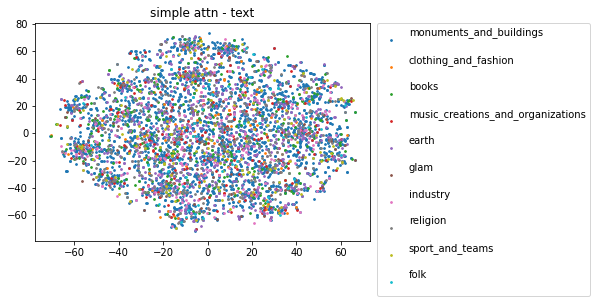

In [9]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=3)

# plt.scatter(embedded_data_text[:, 0], embedded_data_text[:, 1], s=3)
# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('simple attn - text')
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/simple_attn_image_embeds.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/simple_attn_topics.csv")
topics = f.readlines()
# emb = emb[:5000]
# topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

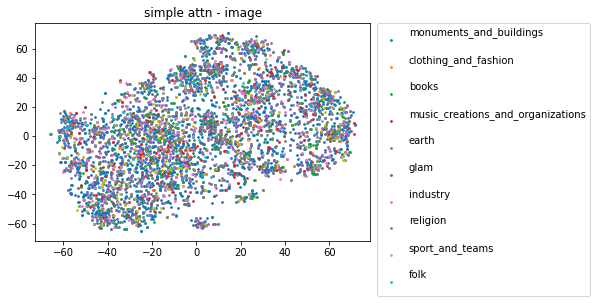

In [11]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=3)

# plt.scatter(embedded_data_text[:, 0], embedded_data_text[:, 1], s=3)
# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('simple attn - image')
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/torch_attn_image_embeds.pt').cpu()
emb = ff[0].to('cpu')
#emb = emb[:1000]

f = open("./saved_embeddings/torch_attn_topics.csv")
topics = f.readlines()
# emb = emb[:5000]
# topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


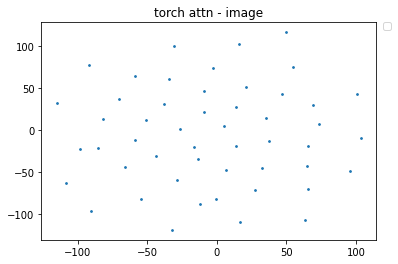

In [25]:
# labels = topics
# scatter_groups = {}
# for i, label in enumerate(labels):
#     if label not in scatter_groups:
#         scatter_groups[label] = []
#     scatter_groups[label].append(i)

# for label, indices in scatter_groups.items():
#     plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=3)

plt.scatter(embedded_data_text[:, 0], embedded_data_text[:, 1], s=3)
# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('torch attn - image')
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/torch_attn_image_embeds.pt').cpu()
emb = ff1[0].to('cpu')
#emb = emb[:1000]

f = open("./saved_embeddings/torch_attn_topics.csv")
topics = f.readlines()
# emb = emb[:5000]
# topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


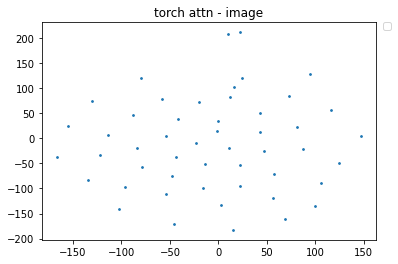

In [28]:
# labels = topics
# scatter_groups = {}
# for i, label in enumerate(labels):
#     if label not in scatter_groups:
#         scatter_groups[label] = []
#     scatter_groups[label].append(i)

# for label, indices in scatter_groups.items():
#     plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=3)

plt.scatter(embedded_data_text[:, 0], embedded_data_text[:, 1], s=3)
# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('torch attn - image')
plt.show()

In [35]:
total = torch.cat([ff[0],ff1[0]])
labels = ['simple']*50 + ['torch']*50

In [36]:
total.shape

torch.Size([100, 256])

In [37]:
len(labels)

100

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

# emb = torch.load('./saved_embeddings/torch_attn_image_embeds.pt').cpu()
emb = total.to('cpu')
#emb = emb[:1000]

# f = open("./saved_embeddings/torch_attn_topics.csv")
topics = labels
# emb = emb[:5000]
# topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

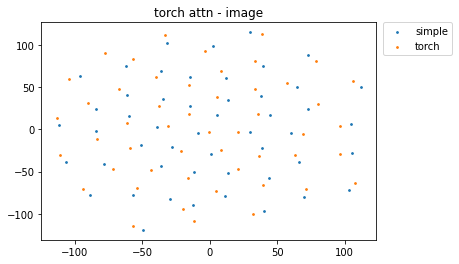

In [39]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=3)


# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('torch attn - image')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/simple_attn_codebook.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/torch_attn_topics.csv")
topics = f.readlines()
# emb = emb[:5000]
# topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

In [19]:
file_path = './saved_embeddings/simple_attn_codebook.pt'
ff = torch.load(file_path)
ff.size()

torch.Size([19, 50, 256])

In [23]:
ff[0]

tensor([[ 0.3580, -0.1392,  1.0615,  ...,  1.7525, -0.2665,  1.9011],
        [-1.6424, -1.5361, -2.3240,  ...,  0.4726,  0.4553,  1.1969],
        [-0.4201,  0.9299, -0.3560,  ...,  0.5138, -0.8403, -0.3886],
        ...,
        [ 0.2006, -1.0233,  1.9925,  ..., -1.5269,  1.2675, -0.7655],
        [-0.9970, -0.5791,  0.2599,  ...,  0.4477, -0.5080,  0.3469],
        [ 0.5331, -0.4063,  2.6085,  ...,  0.0364,  0.9988,  1.6670]],
       device='cuda:0')

In [26]:
file_path = './saved_embeddings/torch_attn_codebook.pt'
ff1 = torch.load(file_path)
ff1.size()

torch.Size([19, 50, 256])

In [11]:
# Apply PCA/TSNE plots with the topic information
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=50)

emb = torch.load('./saved_embeddings/multimodal_noc_image_embeds.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/multimodal_topics_noc.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)


# plt.scatter(embedded_data_text[:, 0], embedded_data_text[:, 1], s=1)
# plt.title('t-SNE Visualization of Embeddings; perplexity=25')
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


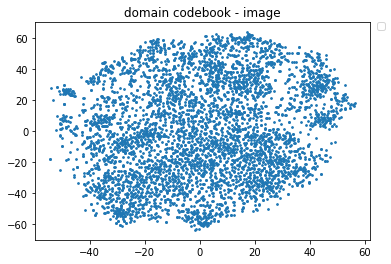

In [13]:
# labels = topics
# scatter_groups = {}
# for i, label in enumerate(labels):
#     if label not in scatter_groups:
#         scatter_groups[label] = []
#     scatter_groups[label].append(i)

# for label, indices in scatter_groups.items():
#     plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=2)

plt.scatter(embedded_data_text[:, 0], embedded_data_text[:, 1], s=3)
# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('domain codebook - image')
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./image_embeds_test.pt').cpu()

#emb = emb[:1000]

f = open("./normal_topics_test.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

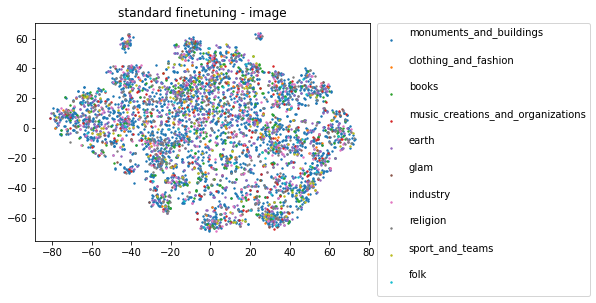

In [19]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=2)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('standard finetuning - image')
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./text_embeds_test.pt').cpu()

#emb = emb[:1000]

f = open("./normal_topics_test.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)


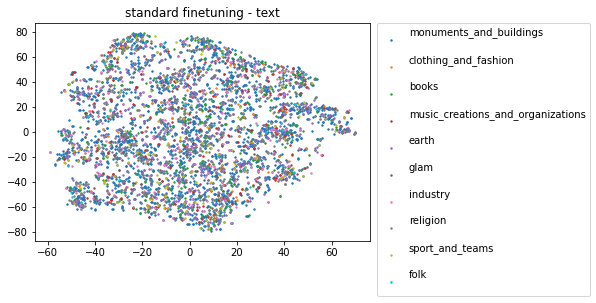

In [21]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=2)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('standard finetuning - text')
plt.show()

### Separate Codebooks

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./text_embeds_domain_test_separate.pt').cpu()

#emb = emb[:1000]

f = open("./domain_topics_test_separate.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

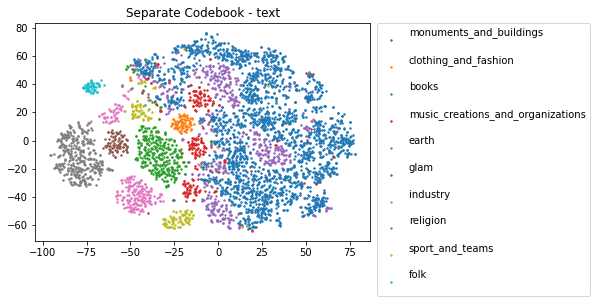

In [5]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=2)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Separate Codebook - text')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./image_embeds__domain_test_separate.pt').cpu()

#emb = emb[:1000]

f = open("./domain_topics_test_separate.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

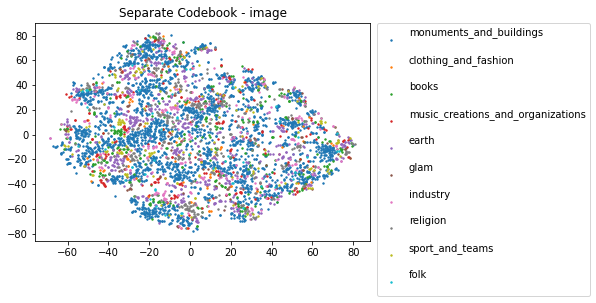

In [8]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=2)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Separate Codebook - image')
plt.show()

## Multimodal Codebooks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/multimodal_image_embeds.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/multimodal_topics.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

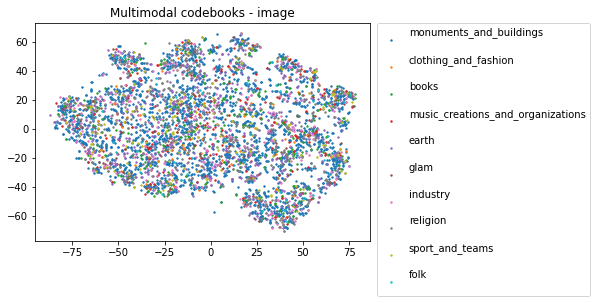

In [3]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=2)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Multimodal codebooks - image')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/multimodal_text_embeds.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/multimodal_topics.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

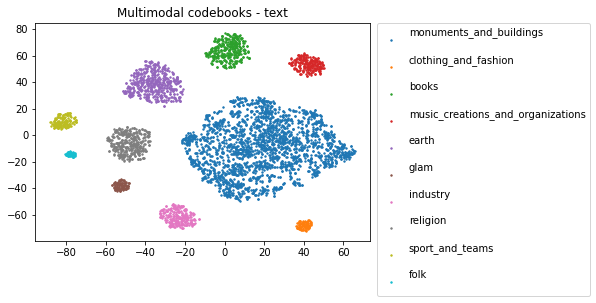

In [6]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=2)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Multimodal codebooks - text')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/multimodal_noc_text_embeds.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/multimodal_topics_noc.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

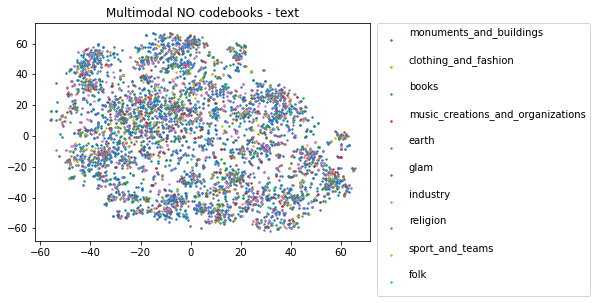

In [3]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=2)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Multimodal NO codebooks - text')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/multimodal_noc_text_embeds.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/multimodal_topics_noc.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

## Domain Codebooks with shared layernorm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/domain_sharednorm_image_embeds.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/multimodal_topics.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)

In [ ]:
labels = topics
scatter_groups = {}
for i, label in enumerate(labels):
    if label not in scatter_groups:
        scatter_groups[label] = []
    scatter_groups[label].append(i)

for label, indices in scatter_groups.items():
    plt.scatter(embedded_data_text[indices, 0], embedded_data_text[indices, 1], label=label,s=2)

# Add legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.title('Multimodal codebooks - image')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=32, perplexity=32)

emb = torch.load('./saved_embeddings/multimodal_text_embeds.pt').cpu()

#emb = emb[:1000]

f = open("./saved_embeddings/multimodal_topics.csv")
topics = f.readlines()
emb = emb[:5000]
topics = topics[:5000]


embedded_data_text = tsne.fit_transform(emb)